# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = ./images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [256]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our goal is to understand what factors make a car more or less expensive. We need to provide clear recommendations to our client, a used car dealership, as to what consumers value in a used car. In other words, which features impact the price positively or negatively and what is the level of impact vs other features.

- We need to understand the available data on the used cars.
- Clean up and prepare the data for analysis
- Understand the different features of the used cars that are available for analysis.
- Analyze the correlation between the features including the correlation to the price.
- Use appropriate techniques to find the best features
- Figure out the best model that can be used
- Find the best values for the hyper parameters
- Select the best model along with the properly tuned hype parameters
- Present the analysis that could be consumed by the used car dealership team without any technical jargon

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Handle missing values - drop the data or the column - or impute the missing data
2. Look for and remove duplicates
3. Encode categorical variables into numeric format 
4. Identify and handle outliers 
5. Check correlation and multicollinearity 
6. Determine the best features impacting price using SequentialFeatureSelector, Lasso and other tools
7. Drop unnecessary columns

### Import data

In [257]:
df = pd.read_csv('data/vehicles.csv')
df

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
...             ...          ...                ...   ...  ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[426880 rows x 18 columns]

#### Review and Explore the data ####
* Look at the distribution, missing values, inconsistent/incorrect data, outliers
* Make decisions on dropping NAs, imputing data, dropping columns due to mostly missing or incorrect data

In [258]:
df.sample(n=10)

id                   region  price    year   manufacturer  \
393689  7312893596  norfolk / hampton roads   3990  2005.0          honda   
248837  7312907948                las vegas   5800  2008.0            NaN   
407974  7316837579           seattle-tacoma  38999  2019.0          dodge   
144571  7314965095                 rockford  31590  2020.0          mazda   
301858  7313767757                   toledo   4995  2005.0      chevrolet   
71112   7308077563              yuba-sutter  10999  2013.0        hyundai   
120405  7303037239           treasure coast  43990  2019.0      chevrolet   
152365  7310639034             indianapolis   4000  2004.0           ford   
174795  7311605286              baton rouge      0  2015.0         nissan   
313543  7307709952                     bend  33857  2017.0  mercedes-benz   

                          model  condition    cylinders fuel  odometer  \
393689                  odyssey        NaN          NaN  gas  167327.0   
248837                 Scion TC  excellent  4 cylinders  gas   97000.0   
407974  durango citadel awd gas        NaN          NaN  gas   42362.0   
144571          mx-5 miata club       good          NaN  gas    2195.0   
301858           silverado 1500       good  8 cylinders  gas  142200.0   
71112           sonata gls pzev  excellent  4 cylinders  gas  101048.0   
120405    silverado 1500 double       good  8 cylinders  gas    7590.0   
152365   expedition eddie bauer        NaN          NaN  gas  172579.0   
174795    rogue s sport utility        NaN          NaN  gas   83552.0   
313543    gle gle 350 automatic        NaN          NaN  gas   47747.0   

       title_status transmission                VIN drive       size    type  \
393689        clean    automatic  5FNRL384X5B061419   NaN        NaN     van   
248837        clean    automatic                NaN   fwd        NaN     NaN   
407974        clean    automatic  1C4RDJEG2KC738259   4wd        NaN     SUV   
144571        clean        other  JM1NDAC74L0413665   rwd        NaN   other   
301858        clean    automatic                NaN   rwd  full-size   truck   
71112           NaN    automatic  5NPEB4AC8DH523159   NaN        NaN   sedan   
120405        clean    automatic  1GCRYGED2KZ246096   4wd        NaN  pickup   
152365        clean    automatic                NaN   NaN        NaN     NaN   
174795        clean    automatic                NaN   NaN        NaN     NaN   
313543        clean    automatic  4JGDA5HB8HA930022   4wd        NaN     SUV   

       paint_color state  
393689         NaN    va  
248837         NaN    nv  
407974       white    wa  
144571         NaN    il  
301858      silver    oh  
71112          NaN    ca  
120405      silver    fl  
152365         NaN    in  
174795         NaN    la  
313543       black    or

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [260]:
df.describe().round(2)

id         price       year     odometer
count  4.268800e+05  4.268800e+05  425675.00    422480.00
mean   7.311487e+09  7.519903e+04    2011.24     98043.33
std    4.473170e+06  1.218228e+07       9.45    213881.50
min    7.207408e+09  0.000000e+00    1900.00         0.00
25%    7.308143e+09  5.900000e+03    2008.00     37704.00
50%    7.312621e+09  1.395000e+04    2013.00     85548.00
75%    7.315254e+09  2.648575e+04    2017.00    133542.50
max    7.317101e+09  3.736929e+09    2022.00  10000000.00

In [261]:
df.isna().sum().sort_values()

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64

In [262]:
df.isna().mean().sort_values()

id              0.000000
price           0.000000
state           0.000000
region          0.000000
year            0.002823
transmission    0.005988
fuel            0.007058
odometer        0.010307
model           0.012362
title_status    0.019308
manufacturer    0.041337
type            0.217527
paint_color     0.305011
drive           0.305863
VIN             0.377254
condition       0.407852
cylinders       0.416225
size            0.717675
dtype: float64

In [263]:
df.state.nunique()

51

In [264]:
df.state.value_counts().sort_values()[-5:]

state
oh    17696
ny    19386
tx    22945
fl    28511
ca    50614
Name: count, dtype: int64

In [265]:
df.region.nunique()

404

In [266]:
df.region.value_counts().sort_values()[-5:]

region
fresno / madera            2983
eugene                     2985
spokane / coeur d'alene    2988
jacksonville               3562
columbus                   3608
Name: count, dtype: int64

In [267]:
df.model.nunique()

29649

In [268]:
df.model.mode()[0]

'f-150'

In [269]:
df.model.value_counts().sort_values()[-5:]

model
silverado         3023
camry             3135
1500              4211
silverado 1500    5140
f-150             8009
Name: count, dtype: int64

In [270]:
df.manufacturer.nunique()

42

In [271]:
df.manufacturer.value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [272]:
df.fuel.value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [273]:
df.query("fuel=='other'").sample(10)

id       region  price    year   manufacturer  \
172144  7302590740    lexington  33990  2020.0       infiniti   
114671  7309897065  space coast  30590  2017.0        lincoln   
316555  7314929509       eugene  83900  2020.0           ford   
261145  7311889915  albuquerque  29990  2015.0  mercedes-benz   
224854  7305049955     billings   8995  2004.0      chevrolet   
317819  7310997310       eugene  65900  2017.0           ford   
13885   7316814204       tucson  10990  2010.0         subaru   
335480  7316907500   pittsburgh  26590  2015.0           audi   
338718  7306125652      poconos  28590  2017.0          buick   
261431  7311305375  albuquerque  37590  2017.0         toyota   

                                                    model condition  \
172144                            qx50 luxe sport utility      good   
114671                               continental premiere      good   
316555  f-350 lifted super duty power stroke diesel lo...       NaN   
261145                                    gl-class gl 350      good   
224854                                           colorado       NaN   
317819  f-350 lifted f350 lariat 6.7l power stroke die...       NaN   
13885                                            forester       NaN   
335480                         allroad premium plus wagon      good   
338718                              enclave leather sport      good   
261431                          tundra double cab limited      good   

          cylinders   fuel  odometer title_status transmission  \
172144          NaN  other   19042.0        clean        other   
114671          NaN  other   10537.0        clean        other   
316555  8 cylinders  other   17355.0        clean    automatic   
261145          NaN  other   72831.0        clean        other   
224854          NaN  other  174812.0        clean    automatic   
317819  8 cylinders  other   56461.0        clean    automatic   
13885           NaN  other  105517.0        clean    automatic   
335480          NaN  other   26768.0        clean        other   
338718          NaN  other   40227.0        clean        other   
261431  8 cylinders  other   25846.0        clean    automatic   

                      VIN drive size       type paint_color state  
172144  3PCAJ5M32LF103154   NaN  NaN  hatchback       brown    ky  
114671  1LN6L9VK1H5636372   NaN  NaN      sedan         NaN    fl  
316555  1FT8W3BT5LEC83528   4wd  NaN     pickup       black    or  
261145  4JGDF2EE1FA526071   NaN  NaN        SUV         NaN    nm  
224854  1GCDT196548172828   NaN  NaN        NaN         NaN    mt  
317819  1FT8W3BT7HED88823   4wd  NaN     pickup       white    or  
13885                 NaN   NaN  NaN        NaN         NaN    az  
335480  WA1UFAFL5FA034438   NaN  NaN      wagon       black    pa  
338718  5GAKVBKD9HJ263102   NaN  NaN        SUV         NaN    pa  
261431  5TFSW5F13HX226833   NaN  NaN     pickup         NaN    nm

In [274]:
df.type.value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [275]:
df.type.mode()[0]

'sedan'

In [276]:
df.condition.mode()

0    good
Name: condition, dtype: object

In [277]:
df.condition.value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [278]:
df.cylinders.value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [279]:
df.drive.value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [280]:
df['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [281]:
df.transmission.value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [282]:
df.title_status.value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

#### Drop columns ####
- Drop id and VIN columns as they do not have any impact on the price of vehicle

In [283]:
df.drop(['id', 'VIN'], axis=1, inplace=True)

* Let's look at percentage of null values by column

[Text(0.5, 0, 'Column'),
 Text(0, 0.5, '% Null Values'),
 Text(0.5, 1.0, '% Null Values by Column')]

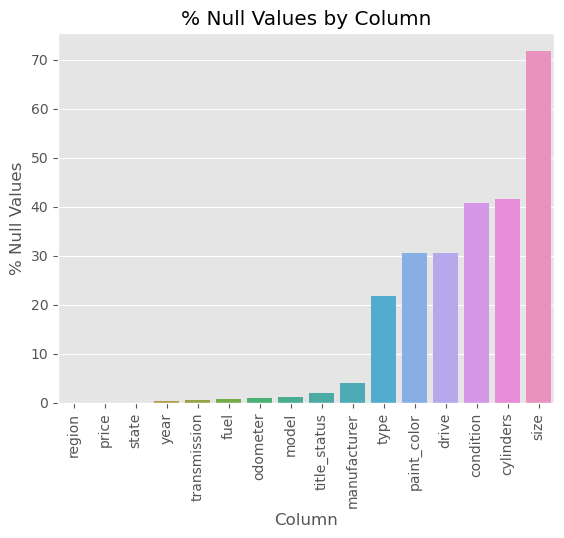

In [284]:
pcts = (df.isna().mean().sort_values()*100).round(2)
fig=sns.barplot(x=pcts.index, y=pcts.values)
plt.xticks(rotation=90)
fig.set(xlabel='Column', ylabel='% Null Values', title='% Null Values by Column')

In [285]:
df[df.type.isna()].sample(10)

region  price    year manufacturer  \
51121                 reno / tahoe  10995  2015.0       subaru   
422369                   milwaukee   9999  2011.0    chevrolet   
323797                    portland   6000  2008.0         ford   
255152                north jersey   3500  2000.0    chevrolet   
235579                fayetteville  13650  2013.0        honda   
304048                      lawton  15500  2008.0         jeep   
153685  lafayette / west lafayette  30000  2013.0          gmc   
360766                   nashville   1500  2017.0        lexus   
169794                     wichita  25988  2018.0         ford   
26470              fresno / madera     10  2011.0          gmc   

                  model  condition    cylinders    fuel  odometer  \
51121           impreza       good  4 cylinders     gas  117007.0   
422369  traverse lt awd        NaN          NaN     gas  161951.0   
323797             edge        NaN          NaN     gas  146000.0   
255152           blazer       good  6 cylinders     gas  119000.0   
235579      accord lx-s        NaN          NaN     gas   79295.0   
304048       wrangler x  excellent  6 cylinders     gas   72500.0   
153685    sierra 2500hd  excellent          NaN  diesel  162900.0   
360766              NaN        NaN          NaN     gas   92237.0   
169794          mustang   like new          NaN     gas   33754.0   
26470            sierra        NaN          NaN     gas  295000.0   

       title_status transmission drive size type paint_color state  
51121       rebuilt    automatic   4wd  NaN  NaN       black    ca  
422369        clean    automatic   4wd  NaN  NaN         NaN    wi  
323797      rebuilt    automatic   NaN  NaN  NaN         NaN    or  
255152        clean    automatic   4wd  NaN  NaN         NaN    nj  
235579        clean    automatic   NaN  NaN  NaN         NaN    nc  
304048        clean    automatic   4wd  NaN  NaN       white    ok  
153685        clean    automatic   NaN  NaN  NaN       black    in  
360766        clean    automatic   NaN  NaN  NaN         NaN    tn  
169794        clean    automatic   NaN  NaN  NaN         NaN    ks  
26470         clean    automatic   NaN  NaN  NaN         NaN    ca

**Columns: size, cylinders, drive, paint_color, type**
* These columns have over 30%(~22% for 'type') null values and imputing them to mode or any specific values could incorrectly skew the data away from reality
* *Drop these columns*


In [286]:
df.drop(['size', 'cylinders', 'drive', 'paint_color', 'type'], axis = 1, inplace=True)

#### Impute columns ####
- Reviewing the data and business understanding, it is reasonable to impute the below column null values with the mode values
- *condition, transmission, title_status, fuel*

In [287]:
df.condition.fillna(df['condition'].mode()[0], inplace=True)
df.transmission.fillna(df['transmission'].mode()[0], inplace=True)
df.title_status.fillna(df['title_status'].mode()[0], inplace=True)
df.fuel.fillna(df['fuel'].mode()[0], inplace=True)


#### Drop NAs ####
- Columns: manufacturer, model, year, odometer
- There is no reasonable value to impute these columns and the number of null values are a small percentage

In [288]:
df.isna().sum().sort_values()

region              0
price               0
condition           0
fuel                0
title_status        0
transmission        0
state               0
year             1205
odometer         4400
model            5277
manufacturer    17646
dtype: int64

In [289]:
df.dropna(inplace=True)
df

region  price    year manufacturer                     model  \
27       auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010.0    chevrolet            silverado 1500   
29       auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30       auburn  30990  2017.0       toyota      tundra double cab sr   
31       auburn  15000  2013.0         ford                 f-150 xlt   
...         ...    ...     ...          ...                       ...   
426875  wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020.0     cadillac          xt4 sport suv 4d   
426878  wyoming  28990  2018.0        lexus           es 350 sedan 4d   
426879  wyoming  30590  2019.0          bmw  4 series 430i gran coupe   

        condition    fuel  odometer title_status transmission state  
27           good     gas   57923.0        clean        other    al  
28           good     gas   71229.0        clean        other    al  
29           good     gas   19160.0        clean        other    al  
30           good     gas   41124.0        clean        other    al  
31      excellent     gas  128000.0        clean    automatic    al  
...           ...     ...       ...          ...          ...   ...  
426875       good     gas   32226.0        clean        other    wy  
426876       good     gas   12029.0        clean        other    wy  
426877       good  diesel    4174.0        clean        other    wy  
426878       good     gas   30112.0        clean        other    wy  
426879       good     gas   22716.0        clean        other    wy  

[399883 rows x 11 columns]

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399883 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        399883 non-null  object 
 1   price         399883 non-null  int64  
 2   year          399883 non-null  float64
 3   manufacturer  399883 non-null  object 
 4   model         399883 non-null  object 
 5   condition     399883 non-null  object 
 6   fuel          399883 non-null  object 
 7   odometer      399883 non-null  float64
 8   title_status  399883 non-null  object 
 9   transmission  399883 non-null  object 
 10  state         399883 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 36.6+ MB


**Univariate Analysis**  
Target column is price

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

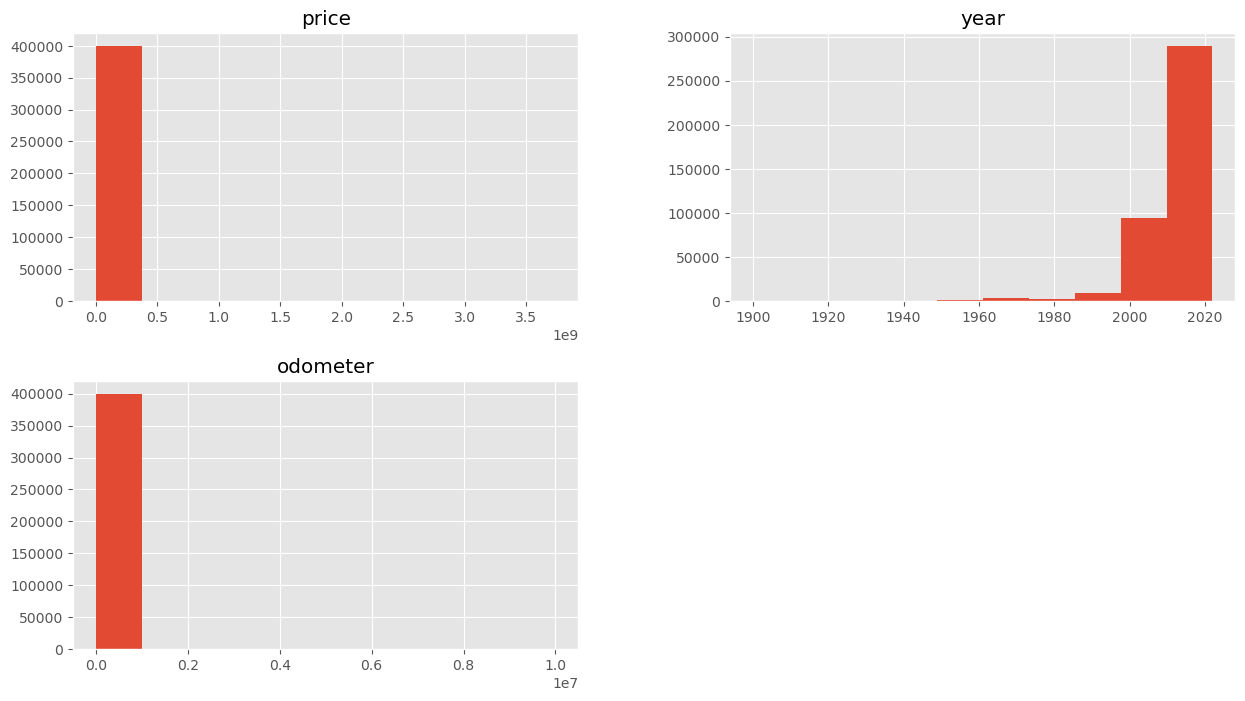

In [291]:
df.hist(figsize = (15,8))

In [292]:
df.describe().round(2)

price       year     odometer
count  3.998830e+05  399883.00    399883.00
mean   6.273112e+04    2011.65     96170.87
std    1.130055e+07       8.58    189824.97
min    0.000000e+00    1900.00         0.00
25%    5.995000e+03    2009.00     38193.50
50%    1.399500e+04    2014.00     85739.00
75%    2.659000e+04    2017.00    133008.00
max    3.736929e+09    2022.00  10000000.00

#### Handle Outliers
* Each of these columns (price, year, odometer) seem to have some outliers which skew the data significantly
* Analyze further and remove the outliers

[Text(0.5, 1.0, 'Price Distribution')]

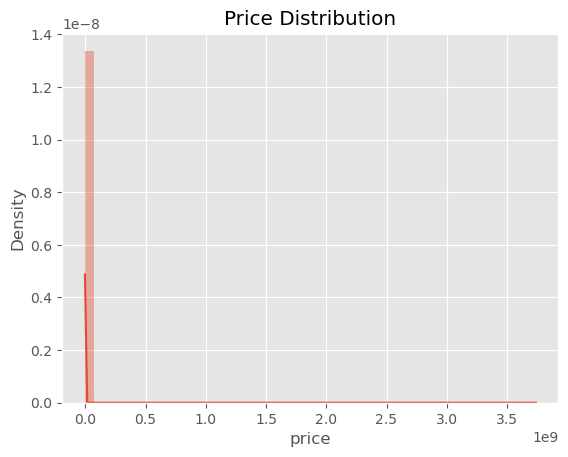

In [293]:
sns.distplot(df['price']).set(title = "Price Distribution")

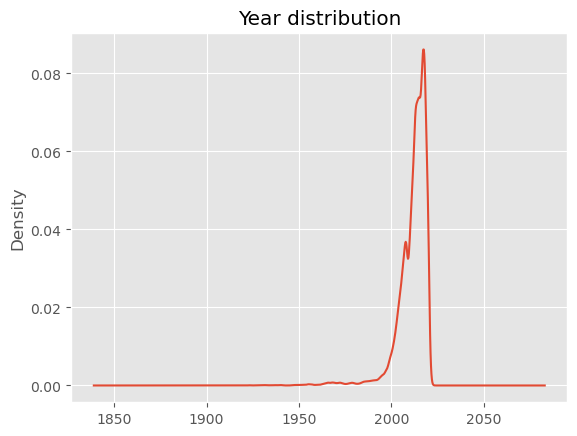

In [294]:
df['year'].plot(kind = 'kde', title = "Year distribution");

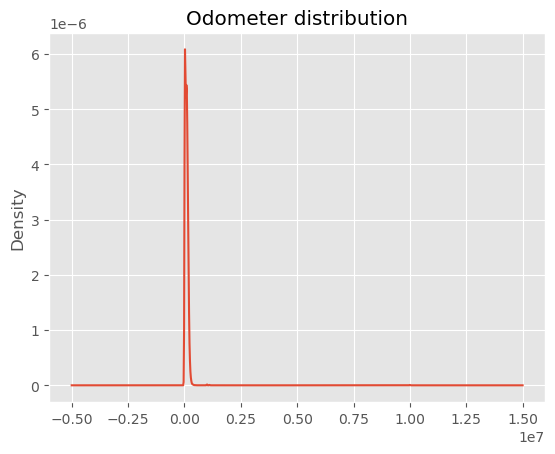

In [295]:
df['odometer'].plot(kind = 'kde', title = "Odometer distribution");

In [296]:
len(df.query("price > 70000 | price < 1"))

31389

In [297]:
len(df.query("year < 1990"))

9072

In [298]:
len(df.query("odometer > 300000"))

2004

In [299]:
len(df.query("odometer < 0"))

0

#### Remove Outliers
* Based on the distribution, removing price > 100,000 or <=0, year < 1990 and odometer > 300,000 will get rid of most of the outliers and help in our analysis

In [300]:
df = df[(df.price <= 70000) & (df.price > 0) & (df.year >= 1990) & (df.odometer < 300000)]
df

region  price    year manufacturer                     model  \
27       auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010.0    chevrolet            silverado 1500   
29       auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30       auburn  30990  2017.0       toyota      tundra double cab sr   
31       auburn  15000  2013.0         ford                 f-150 xlt   
...         ...    ...     ...          ...                       ...   
426875  wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020.0     cadillac          xt4 sport suv 4d   
426878  wyoming  28990  2018.0        lexus           es 350 sedan 4d   
426879  wyoming  30590  2019.0          bmw  4 series 430i gran coupe   

        condition    fuel  odometer title_status transmission state  
27           good     gas   57923.0        clean        other    al  
28           good     gas   71229.0        clean        other    al  
29           good     gas   19160.0        clean        other    al  
30           good     gas   41124.0        clean        other    al  
31      excellent     gas  128000.0        clean    automatic    al  
...           ...     ...       ...          ...          ...   ...  
426875       good     gas   32226.0        clean        other    wy  
426876       good     gas   12029.0        clean        other    wy  
426877       good  diesel    4174.0        clean        other    wy  
426878       good     gas   30112.0        clean        other    wy  
426879       good     gas   22716.0        clean        other    wy  

[357918 rows x 11 columns]

#### Review numeric values distribution

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>, <Axes: >]], dtype=object)

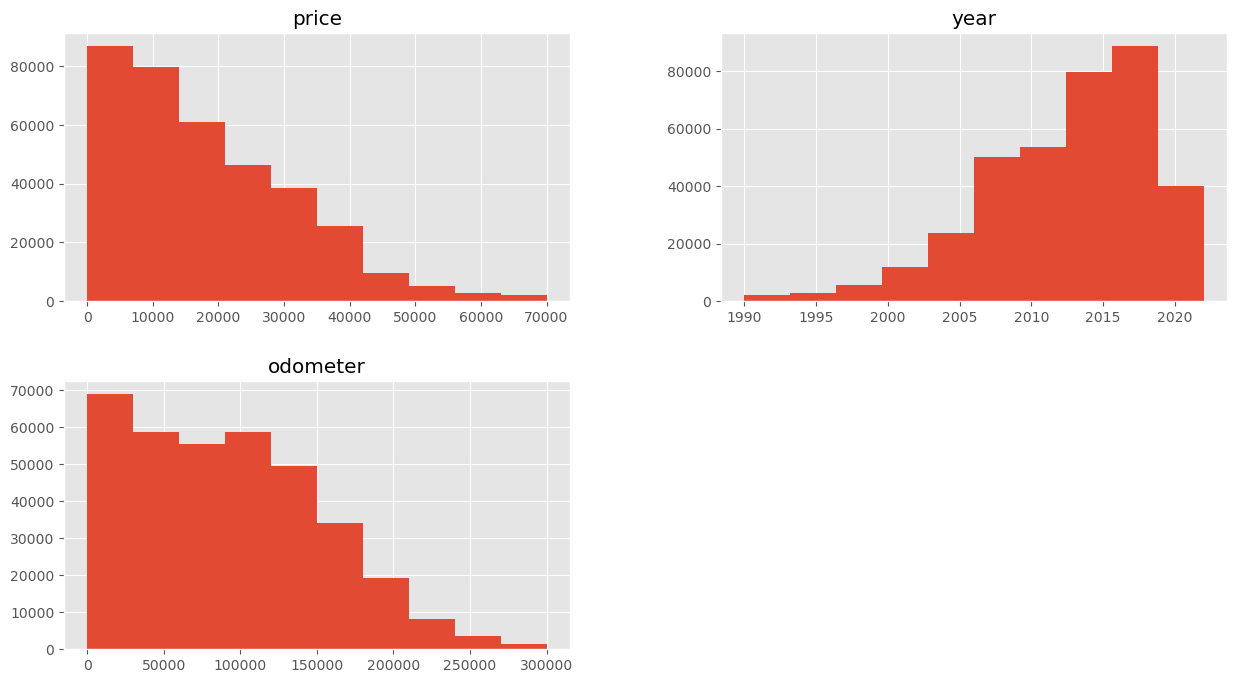

In [301]:
df.hist(figsize = (15,8))

[Text(0.5, 1.0, 'Price Distribution')]

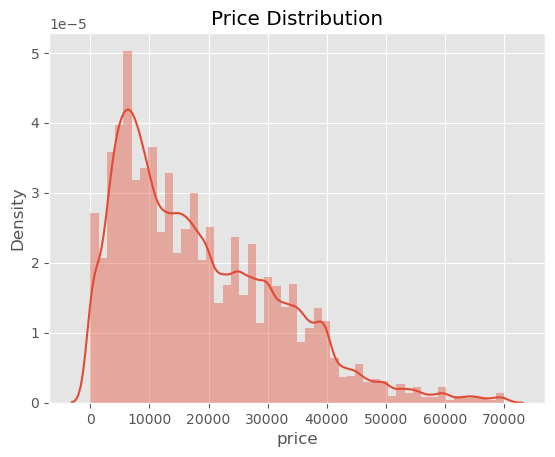

In [302]:
sns.distplot(df['price']).set(title = "Price Distribution")

*Large number of cars are under 25k, with a large majority within 40k*


[Text(0.5, 1.0, 'Log Transformed Price Distribution')]

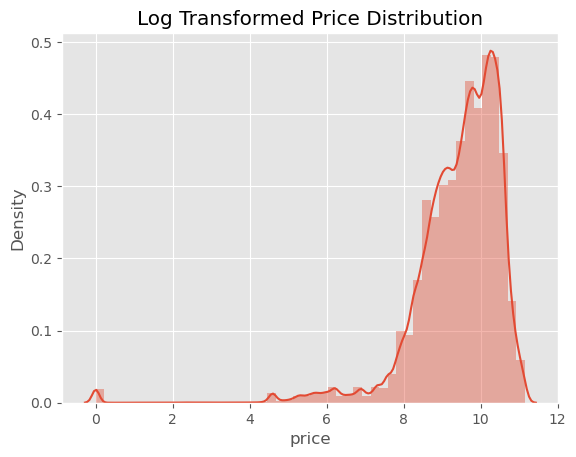

In [303]:
log_price = np.log(df['price'])
sns.distplot(log_price).set(title = 'Log Transformed Price Distribution')

[Text(0.5, 1.0, 'Year Distribution')]

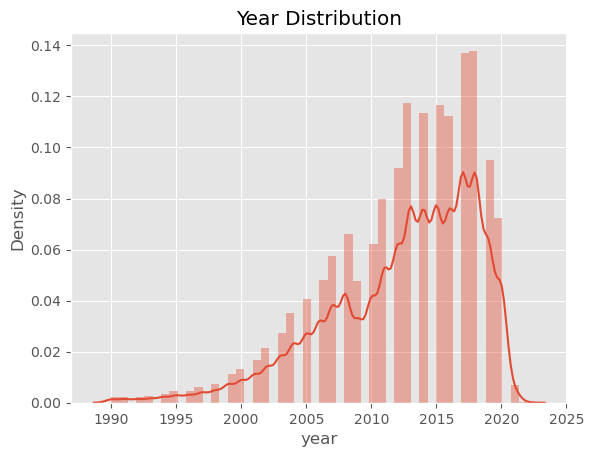

In [304]:
sns.distplot(df['year']).set(title = "Year Distribution")

*Large percentage of cars are from recent 10 years*

[Text(0.5, 1.0, 'Odometer Distribution')]

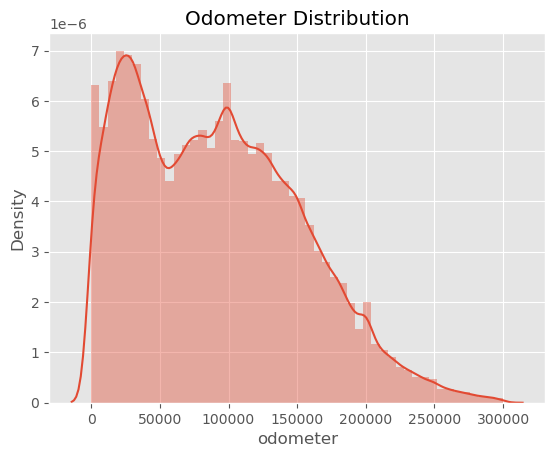

In [305]:
sns.distplot(df['odometer']).set(title = "Odometer Distribution")

*Majority of cars have odometer values below 150k*

**Bi-variate Analysis**

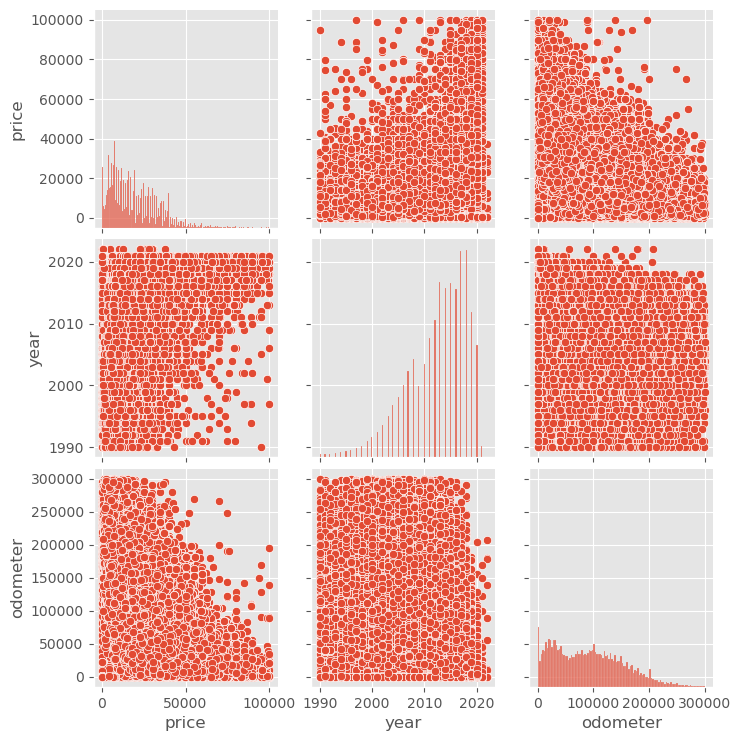

In [58]:
sns.pairplot(df)

***Above shows 'price' positively correlated to 'year' and negatively correlated to 'odometer'***

In [306]:
corr = df.corr(numeric_only = True).round(3)
corr

price   year  odometer
price     1.000  0.579    -0.538
year      0.579  1.000    -0.647
odometer -0.538 -0.647     1.000

<Axes: >

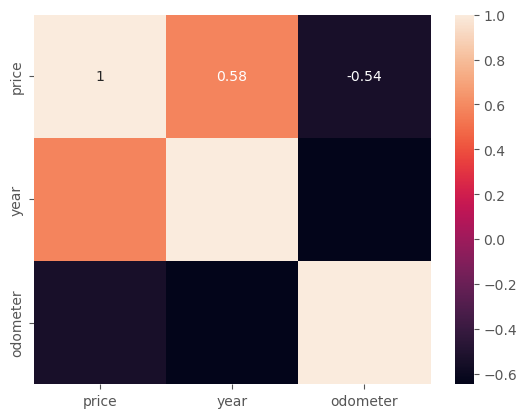

In [307]:
sns.heatmap(corr, annot = True)

* ***Price has high positive correlation with Year -- newer models -> higher price***
* ***Price is negatively correlated with Odometer -- lower miles -> higher price***
* ***Odometer and Year are negatively correlated -- makes sense as cars are typically driven at a similar rate each year***

In [308]:
#set aside this df as cleaned df
clean_df = df
print(clean_df.shape)
df.shape

(357918, 11)


(357918, 11)

In [309]:
clean_df.head(2)

region  price    year manufacturer                     model condition  \
27  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt      good   
28  auburn  22590  2010.0    chevrolet            silverado 1500      good   

   fuel  odometer title_status transmission state  
27  gas   57923.0        clean        other    al  
28  gas   71229.0        clean        other    al

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

- Encode categorical columns
- We can use TargetEncoder on columns: 'state', 'region', 'manufacturer', 'model', 'transmission', 'fuel'
- And Cardinal Encoder on: 'condition', 'title_status'

In [237]:
te = TargetEncoder()
encoded_df = te.fit_transform(df[['state', 'region', 'manufacturer', 'model', 'transmission', 'fuel']], df['price'])
encoded_df

state        region  manufacturer         model  transmission  \
27      20992.756434  28071.916681  24654.726472  35224.934484  28333.662634   
28      20992.756434  28071.916681  19467.517827  23422.653638  28333.662634   
29      20992.756434  28071.916681  19467.517827  34265.976331  28333.662634   
30      20992.756434  28071.916681  17143.926071  34749.481707  28333.662634   
31      20992.756434  28071.916681  20627.753354  20639.368910  16762.211608   
...              ...           ...           ...           ...           ...   
426875  22480.451546  22480.451546  12897.590329  21520.841311  28333.662634   
426876  22480.451546  22480.451546  18541.925197  29470.170329  28333.662634   
426877  22480.451546  22480.451546  20338.415167  34566.344086  28333.662634   
426878  22480.451546  22480.451546  20233.265668  24360.332676  28333.662634   
426879  22480.451546  22480.451546  20091.222652  26383.981433  28333.662634   

                fuel  
27      16814.117090  
28      16814.117090  
29      16814.117090  
30      16814.117090  
31      16814.117090  
...              ...  
426875  16814.117090  
426876  16814.117090  
426877  33100.693932  
426878  16814.117090  
426879  16814.117090  

[357918 rows x 6 columns]

In [238]:
# replace original categorical columns with the encoded ones
df.drop(['state', 'region', 'manufacturer', 'model', 'transmission', 'fuel'], axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df

price    year  condition  odometer title_status         state  \
27      33590  2014.0       good   57923.0        clean  20992.756434   
28      22590  2010.0       good   71229.0        clean  20992.756434   
29      39590  2020.0       good   19160.0        clean  20992.756434   
30      30990  2017.0       good   41124.0        clean  20992.756434   
31      15000  2013.0  excellent  128000.0        clean  20992.756434   
...       ...     ...        ...       ...          ...           ...   
426875  23590  2019.0       good   32226.0        clean  22480.451546   
426876  30590  2020.0       good   12029.0        clean  22480.451546   
426877  34990  2020.0       good    4174.0        clean  22480.451546   
426878  28990  2018.0       good   30112.0        clean  22480.451546   
426879  30590  2019.0       good   22716.0        clean  22480.451546   

              region  manufacturer         model  transmission          fuel  
27      28071.916681  24654.726472  35224.934484  28333.662634  16814.117090  
28      28071.916681  19467.517827  23422.653638  28333.662634  16814.117090  
29      28071.916681  19467.517827  34265.976331  28333.662634  16814.117090  
30      28071.916681  17143.926071  34749.481707  28333.662634  16814.117090  
31      28071.916681  20627.753354  20639.368910  16762.211608  16814.117090  
...              ...           ...           ...           ...           ...  
426875  22480.451546  12897.590329  21520.841311  28333.662634  16814.117090  
426876  22480.451546  18541.925197  29470.170329  28333.662634  16814.117090  
426877  22480.451546  20338.415167  34566.344086  28333.662634  33100.693932  
426878  22480.451546  20233.265668  24360.332676  28333.662634  16814.117090  
426879  22480.451546  20091.222652  26383.981433  28333.662634  16814.117090  

[357918 rows x 11 columns]

***Ordinal encoding for categorical columns 'condition' and 'title_status'***

In [239]:
df.condition.unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [240]:
oe = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
df[['condition']] = oe.fit_transform(df[['condition']])

In [241]:
df.title_status.unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [242]:
oe = OrdinalEncoder(categories = [['parts only', 'salvage', 'rebuilt', 'missing', 'lien', 'clean']])
df[['title_status']] = oe.fit_transform(df[['title_status']])

In [243]:
df

price    year  condition  odometer  title_status         state  \
27      33590  2014.0        2.0   57923.0           5.0  20992.756434   
28      22590  2010.0        2.0   71229.0           5.0  20992.756434   
29      39590  2020.0        2.0   19160.0           5.0  20992.756434   
30      30990  2017.0        2.0   41124.0           5.0  20992.756434   
31      15000  2013.0        3.0  128000.0           5.0  20992.756434   
...       ...     ...        ...       ...           ...           ...   
426875  23590  2019.0        2.0   32226.0           5.0  22480.451546   
426876  30590  2020.0        2.0   12029.0           5.0  22480.451546   
426877  34990  2020.0        2.0    4174.0           5.0  22480.451546   
426878  28990  2018.0        2.0   30112.0           5.0  22480.451546   
426879  30590  2019.0        2.0   22716.0           5.0  22480.451546   

              region  manufacturer         model  transmission          fuel  
27      28071.916681  24654.726472  35224.934484  28333.662634  16814.117090  
28      28071.916681  19467.517827  23422.653638  28333.662634  16814.117090  
29      28071.916681  19467.517827  34265.976331  28333.662634  16814.117090  
30      28071.916681  17143.926071  34749.481707  28333.662634  16814.117090  
31      28071.916681  20627.753354  20639.368910  16762.211608  16814.117090  
...              ...           ...           ...           ...           ...  
426875  22480.451546  12897.590329  21520.841311  28333.662634  16814.117090  
426876  22480.451546  18541.925197  29470.170329  28333.662634  16814.117090  
426877  22480.451546  20338.415167  34566.344086  28333.662634  33100.693932  
426878  22480.451546  20233.265668  24360.332676  28333.662634  16814.117090  
426879  22480.451546  20091.222652  26383.981433  28333.662634  16814.117090  

[357918 rows x 11 columns]

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357918 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         357918 non-null  int64  
 1   year          357918 non-null  float64
 2   condition     357918 non-null  float64
 3   odometer      357918 non-null  float64
 4   title_status  357918 non-null  float64
 5   state         357918 non-null  float64
 6   region        357918 non-null  float64
 7   manufacturer  357918 non-null  float64
 8   model         357918 non-null  float64
 9   transmission  357918 non-null  float64
 10  fuel          357918 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 32.8 MB


#### Correlation Analysis ####

In [245]:
corr = df.corr().round(2)
corr

price  year  condition  odometer  title_status  state  region  \
price          1.00  0.58      -0.08     -0.54          0.09   0.17    0.27   
year           0.58  1.00      -0.03     -0.65          0.02   0.09    0.16   
condition     -0.08 -0.03       1.00      0.02         -0.03  -0.05   -0.09   
odometer      -0.54 -0.65       0.02      1.00         -0.00  -0.07   -0.14   
title_status   0.09  0.02      -0.03     -0.00          1.00  -0.01    0.03   
state          0.17  0.09      -0.05     -0.07         -0.01   1.00    0.61   
region         0.27  0.16      -0.09     -0.14          0.03   0.61    1.00   
manufacturer   0.35  0.07      -0.05     -0.05          0.05   0.06    0.10   
model          0.72  0.33      -0.15     -0.33          0.08   0.09    0.21   
transmission   0.32  0.35      -0.22     -0.42          0.07  -0.01    0.11   
fuel           0.33  0.07      -0.10     -0.03          0.03   0.04    0.09   

              manufacturer  model  transmission  fuel  
price                 0.35   0.72          0.32  0.33  
year                  0.07   0.33          0.35  0.07  
condition            -0.05  -0.15         -0.22 -0.10  
odometer             -0.05  -0.33         -0.42 -0.03  
title_status          0.05   0.08          0.07  0.03  
state                 0.06   0.09         -0.01  0.04  
region                0.10   0.21          0.11  0.09  
manufacturer          1.00   0.46          0.07  0.22  
model                 0.46   1.00          0.43  0.37  
transmission          0.07   0.43          1.00  0.15  
fuel                  0.22   0.37          0.15  1.00

* *'model', year', 'odometer', 'manufacturer' seem to be the top influencers on price*

<Axes: >

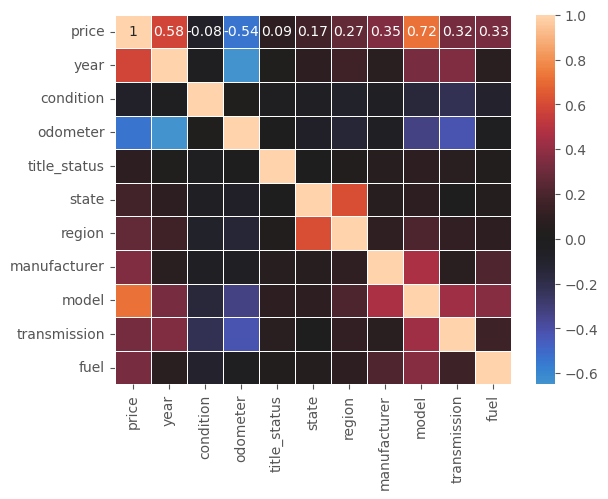

In [246]:
sns.heatmap(corr, center=0, linewidth=0.5, annot=True)

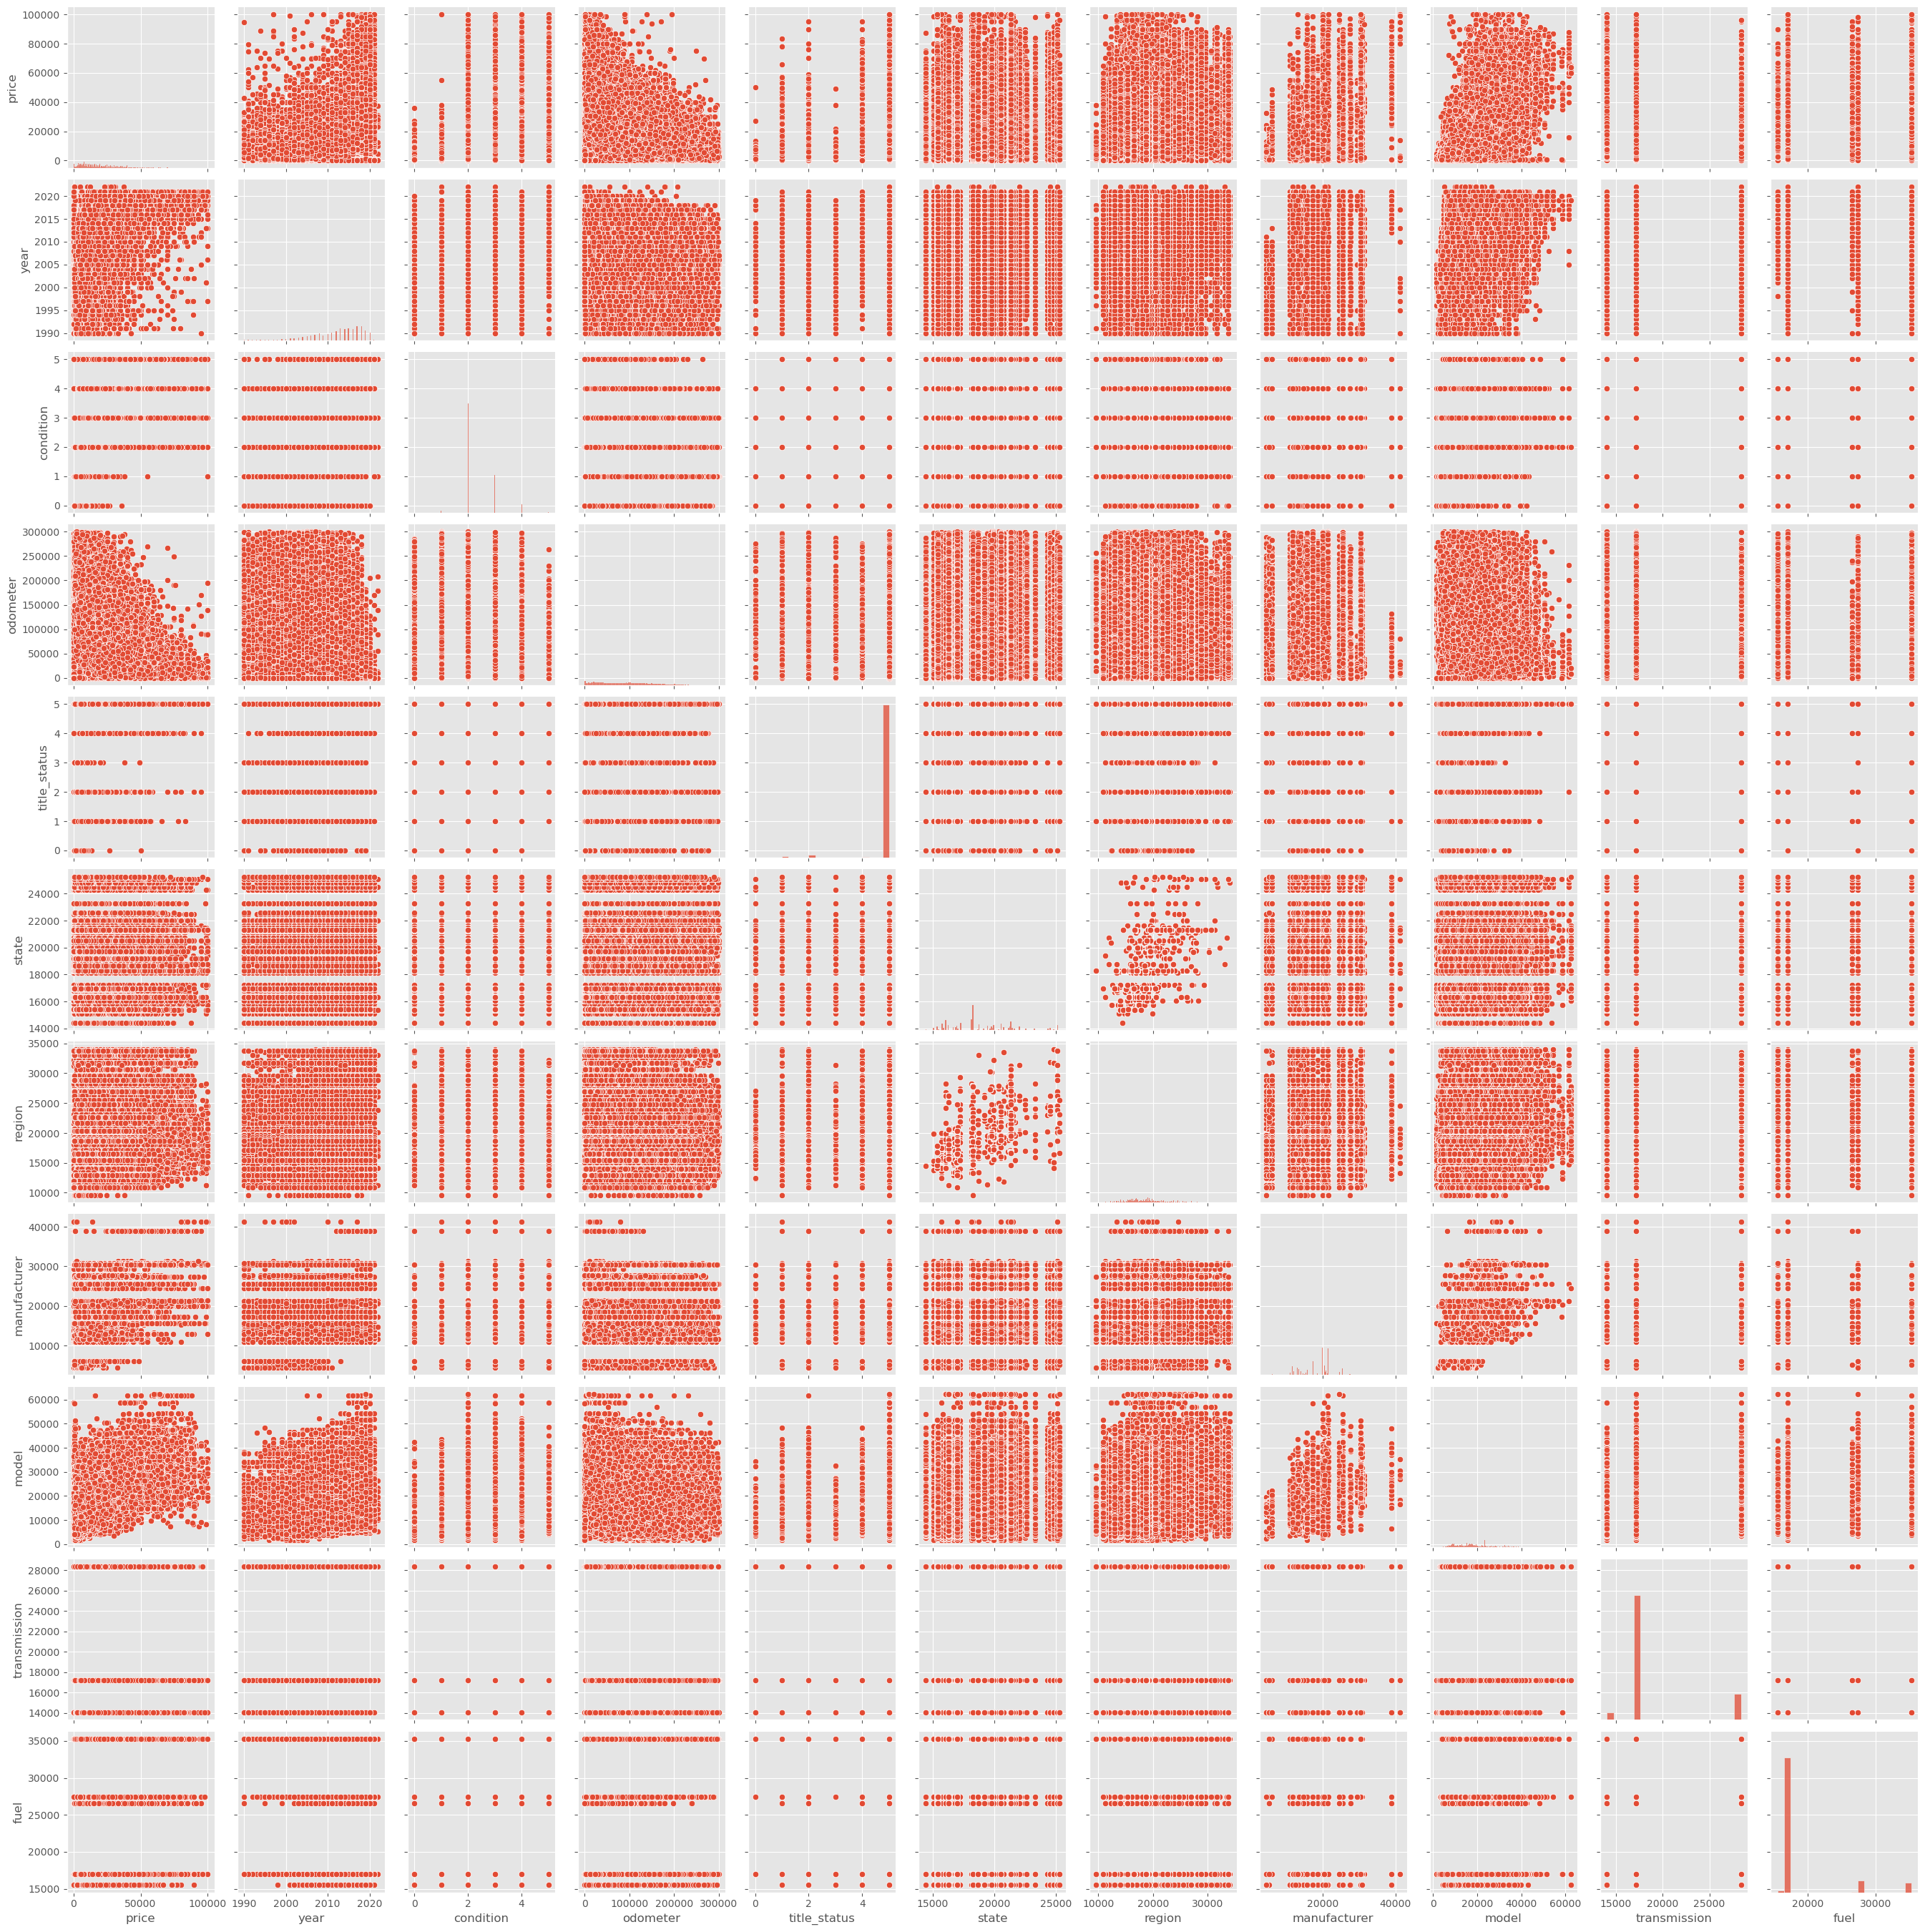

In [71]:
sns.pairplot(df)

#### Train-Test Split ####

In [72]:
X = df.drop(['price'], axis=1)
y = df[['price']]

In [73]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(287944, 10)
(287944, 1)
(71986, 10)
(71986, 1)


### Top 7 features using Sequential Feature Selection ###

In [74]:
sfs = SequentialFeatureSelector(estimator = LinearRegression(),
                                scoring = "neg_mean_squared_error",
                                cv = 5,
                                n_features_to_select = 7)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=7,
                          scoring='neg_mean_squared_error')

In [75]:
sfs_features = sfs.get_feature_names_out(input_features=None)
sfs_features

array(['year', 'odometer', 'region', 'manufacturer', 'model',
       'transmission', 'fuel'], dtype=object)

In [99]:
# We will use these selected features for modeling
X = X[['year', 'odometer', 'region', 'manufacturer', 'model', 'transmission', 'fuel']]
X_train = X_train[['year', 'odometer', 'region', 'manufacturer', 'model', 'transmission', 'fuel']]
X_test = X_test[['year', 'odometer', 'region', 'manufacturer', 'model', 'transmission', 'fuel']]

In [154]:
X

year  odometer        region  manufacturer         model  \
27      2014.0   57923.0  28071.921839  25522.189482  35224.934484   
28      2010.0   71229.0  28071.921839  19996.673153  23435.119494   
29      2020.0   19160.0  28071.921839  19996.673153  34265.976331   
30      2017.0   41124.0  28071.921839  17259.607560  34749.481707   
31      2013.0  128000.0  28071.921839  21272.354408  20789.046296   
...        ...       ...           ...           ...           ...   
426875  2019.0   32226.0  22588.310700  12942.050433  21674.498374   
426876  2020.0   12029.0  22588.310700  18576.322623  29480.175596   
426877  2020.0    4174.0  22588.310700  20593.739763  34566.344086   
426878  2018.0   30112.0  22588.310700  20396.976677  24360.332714   
426879  2019.0   22716.0  22588.310700  20376.015476  26489.803753   

        transmission          fuel  
27      28371.322472  16992.806765  
28      28371.322472  16992.806765  
29      28371.322472  16992.806765  
30      28371.322472  16992.806765  
31      17172.608982  16992.806765  
...              ...           ...  
426875  28371.322472  16992.806765  
426876  28371.322472  16992.806765  
426877  28371.322472  35279.177716  
426878  28371.322472  16992.806765  
426879  28371.322472  16992.806765  

[359930 rows x 7 columns]

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Linear Regression ####

In [111]:
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None #placeholder for best model
    best_mse = np.inf #set best mse to infinity to begin
    mses = []
    for i in range(1, 4):
        pipe = Pipeline([("features", PolynomialFeatures(degree=i, include_bias=False)),
                         ("scaler", StandardScaler()),
                         ("model", LinearRegression())])
        pipe.fit(X_train, y_train)
        mse = float(mean_squared_error(pipe.predict(X_test), y_test))
        mses.append(mse)
        if mse < best_mse:
            best_mse = mse
            best_pipe = pipe
    print(f'Best MSE: {best_mse}')
    print(f'MSEs: {mses}')
    return best_pipe

best_lr_pipe = simple_cross_validation(X_train, y_train, X_test, y_test)
best_lr_pipe.get_params()

Best MSE: 50691224.2332296
MSEs: [63018335.315959565, 53500167.537141845, 50691224.2332296]


{'memory': None,
 'steps': [('features', PolynomialFeatures(degree=3, include_bias=False)),
  ('scaler', StandardScaler()),
  ('model', LinearRegression())],
 'verbose': False,
 'features': PolynomialFeatures(degree=3, include_bias=False),
 'scaler': StandardScaler(),
 'model': LinearRegression(),
 'features__degree': 3,
 'features__include_bias': False,
 'features__interaction_only': False,
 'features__order': 'C',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

#### Lasso Regression #### 

In [101]:
alphas = {"lasso__alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_pipe = Pipeline([("features", PolynomialFeatures(degree=3, include_bias=False)),
                       ("scale", StandardScaler()),
                       ("lasso", Lasso())])
lasso_grid = GridSearchCV(estimator=lasso_pipe,
                          param_grid=alphas,
                          scoring="neg_mean_squared_error",
                          cv=4,
                          verbose=3)  
lasso_grid.fit(X, y)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END .......lasso__alpha=0.0001;, score=-60718937.391 total time=  40.9s
[CV 2/4] END .......lasso__alpha=0.0001;, score=-52759351.660 total time=  44.2s
[CV 3/4] END .......lasso__alpha=0.0001;, score=-52852426.131 total time=  48.1s
[CV 4/4] END .......lasso__alpha=0.0001;, score=-58698655.817 total time=  51.8s
[CV 1/4] END ........lasso__alpha=0.001;, score=-60718935.572 total time=  56.9s
[CV 2/4] END ........lasso__alpha=0.001;, score=-52759326.373 total time= 1.1min
[CV 3/4] END ........lasso__alpha=0.001;, score=-52852394.217 total time= 1.2min
[CV 4/4] END ........lasso__alpha=0.001;, score=-58698727.340 total time= 1.5min
[CV 1/4] END .........lasso__alpha=0.01;, score=-60718921.567 total time= 1.0min
[CV 2/4] END .........lasso__alpha=0.01;, score=-52759074.993 total time=  47.8s
[CV 3/4] END .........lasso__alpha=0.01;, score=-52852079.950 total time=  50.1s
[CV 4/4] END .........lasso__alpha=0.01;, score=-

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('features',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scale', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [103]:
print(f'Lasso best params: {lasso_grid.best_params_}')
print(f'Lasso best score: {lasso_grid.best_score_}')

Lasso best params: {'lasso__alpha': 0.0001}
Lasso best score: -56257342.74989545


In [153]:
lasso_results = pd.DataFrame(lasso_grid.cv_results_).sort_values(by = 'rank_test_score')
lasso_results.head().sort_values(by = 'rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      46.047277      4.053566         0.320817        0.030570   
1      69.857587     11.575256         0.471241        0.102419   
2      55.729966      7.149779         0.346807        0.030790   
3     109.867707     30.203366         0.538341        0.219582   
4      52.063023      4.235080         0.365191        0.032941   

  param_lasso__alpha                    params  split0_test_score  \
0             0.0001  {'lasso__alpha': 0.0001}      -6.071894e+07   
1              0.001   {'lasso__alpha': 0.001}      -6.071894e+07   
2               0.01    {'lasso__alpha': 0.01}      -6.071892e+07   
3                0.1     {'lasso__alpha': 0.1}      -6.071892e+07   
4                1.0     {'lasso__alpha': 1.0}      -6.073600e+07   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0      -5.275935e+07      -5.285243e+07      -5.869866e+07    -5.625734e+07   
1      -5.275933e+07      -5.285239e+07      -5.869873e+07    -5.625735e+07   
2      -5.275907e+07      -5.285208e+07      -5.869945e+07    -5.625738e+07   
3      -5.275692e+07      -5.284942e+07      -5.870687e+07    -5.625803e+07   
4      -5.277853e+07      -5.285538e+07      -5.884733e+07    -5.630431e+07   

   std_test_score  rank_test_score  
0    3.524742e+06                1  
1    3.524768e+06                2  
2    3.525027e+06                3  
3    3.527493e+06                4  
4    3.550812e+06                5

In [132]:
lasso_coefs = lasso_grid.best_estimator_.named_steps['lasso'].coef_
lasso_coefs

array([ 4987.61889741, -2991.68269685,  3580.30855178,  2171.1383232 ,
        3080.01652912,  1706.42822062, -4212.68092612, -1954.90980139,
        -473.57179242,   418.15926658,  1006.07952046,  3277.58029642,
        -474.83406375,   456.14167935,  4105.61632101, -5157.16399643,
       -2828.32585796, -3030.55975938,  4637.60973083,  3694.02526722,
        -631.9506532 ,  2697.01700403,  2061.74139794, -1940.30823654,
        -688.74633568,   -32.00935269,  4240.86499654, -5690.37209948,
       -1245.12088885,  5782.54848012, -4750.51382148,  -434.30169868,
        4710.89481927,   248.10159908,  -104.64191495,   869.22879089,
        -892.0017353 ,   421.83329032,   212.4720809 , -1192.70387781,
        -352.8388016 ,  1019.41949172,  2282.41211076, -4386.92998196,
       -2282.90940816, -3081.31334142,  3790.32663621,  3611.086761  ,
        -154.20117078,  3795.60230357,   419.860954  , -1829.47327532,
        -408.49052176,   998.40379527,  3751.5160918 , -5284.11723691,
      

In [109]:
lasso_grid.best_estimator_.named_steps['features'].get_feature_names_out()

array(['year', 'odometer', 'region', 'manufacturer', 'model',
       'transmission', 'fuel', 'year^2', 'year odometer', 'year region',
       'year manufacturer', 'year model', 'year transmission',
       'year fuel', 'odometer^2', 'odometer region',
       'odometer manufacturer', 'odometer model', 'odometer transmission',
       'odometer fuel', 'region^2', 'region manufacturer', 'region model',
       'region transmission', 'region fuel', 'manufacturer^2',
       'manufacturer model', 'manufacturer transmission',
       'manufacturer fuel', 'model^2', 'model transmission', 'model fuel',
       'transmission^2', 'transmission fuel', 'fuel^2', 'year^3',
       'year^2 odometer', 'year^2 region', 'year^2 manufacturer',
       'year^2 model', 'year^2 transmission', 'year^2 fuel',
       'year odometer^2', 'year odometer region',
       'year odometer manufacturer', 'year odometer model',
       'year odometer transmission', 'year odometer fuel',
       'year region^2', 'year region manu

#### Ridge Regression ####

In [113]:
alphas = {"ridge__alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}
ridgepoly_pipe = Pipeline([("features", PolynomialFeatures(degree=3, include_bias=False)),
                       ("scale", StandardScaler()),
                       ("ridge", Ridge())])
ridgepoly_grid = GridSearchCV(estimator=ridgepoly_pipe,
                          param_grid=alphas,
                          scoring="neg_mean_squared_error",
                          cv=4,
                          verbose=3)  
ridgepoly_grid.fit(X, y)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END .......ridge__alpha=0.0001;, score=-55923212.276 total time=   1.6s
[CV 2/4] END .......ridge__alpha=0.0001;, score=-48645407.724 total time=   1.5s
[CV 3/4] END .......ridge__alpha=0.0001;, score=-48564776.694 total time=   1.6s
[CV 4/4] END .......ridge__alpha=0.0001;, score=-53765028.856 total time=   1.7s
[CV 1/4] END ........ridge__alpha=0.001;, score=-55953871.410 total time=   1.6s
[CV 2/4] END ........ridge__alpha=0.001;, score=-48632582.257 total time=   1.6s
[CV 3/4] END ........ridge__alpha=0.001;, score=-48574315.722 total time=   1.6s
[CV 4/4] END ........ridge__alpha=0.001;, score=-53813884.272 total time=   1.6s
[CV 1/4] END .........ridge__alpha=0.01;, score=-56151229.816 total time=   1.7s
[CV 2/4] END .........ridge__alpha=0.01;, score=-48767523.726 total time=   1.7s
[CV 3/4] END .........ridge__alpha=0.01;, score=-48708982.421 total time=   1.7s
[CV 4/4] END .........ridge__alpha=0.01;, score=-

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('features',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scale', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [114]:
print(f'Ridge best params: {ridgepoly_grid.best_params_}')
print(f'Ridge best score: {ridgepoly_grid.best_score_}')

Ridge best params: {'ridge__alpha': 0.0001}
Ridge best score: -51724606.38753772


In [115]:
ridgepoly_results = pd.DataFrame(ridgepoly_grid.cv_results_).sort_values(by = 'rank_test_score')
ridgepoly_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.418734      0.046073         0.283341        0.011793   
1       1.430173      0.023502         0.269854        0.013725   

  param_ridge__alpha                    params  split0_test_score  \
0             0.0001  {'ridge__alpha': 0.0001}      -5.592321e+07   
1              0.001   {'ridge__alpha': 0.001}      -5.595387e+07   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0      -4.864541e+07      -4.856478e+07      -5.376503e+07    -5.172461e+07   
1      -4.863258e+07      -4.857432e+07      -5.381388e+07    -5.174366e+07   

   std_test_score  rank_test_score  
0    3.211604e+06                1  
1    3.230142e+06                2

In [116]:
ridgepoly_coefs = ridgepoly_grid.best_estimator_.named_steps['ridge'].coef_
ridgepoly_coefs

array([[ 7.84557854e+04, -3.86454828e+05,  1.24510824e+05,
         3.50210906e+05,  1.20449124e+06, -9.87814182e+05,
         1.17907112e+06, -8.41084015e+05,  9.23456017e+05,
        -7.43441301e+05, -1.75400567e+06, -2.76850912e+06,
         8.55843202e+05, -2.59305926e+06, -1.82364981e+05,
         1.24147883e+05, -9.68810392e+04, -7.94986188e+03,
        -3.20516767e+05,  5.07433382e+05,  3.86341898e+05,
        -1.52341380e+05,  4.62390888e+04,  1.83319285e+05,
        -1.19543961e+05,  1.36741051e+06, -1.49737818e+06,
         2.06485525e+05,  3.10556363e+05,  8.54731390e+05,
         1.21137756e+06, -9.47340280e+05,  3.18489209e+05,
         4.98368667e+05, -1.62735018e+05,  7.35619259e+05,
        -5.53743057e+05,  6.25983273e+05,  1.41407536e+06,
         1.56674916e+06,  1.04870257e+06,  1.39686857e+06,
         1.80887580e+05, -1.36240914e+05,  9.20097731e+04,
        -1.50592247e+02,  3.41543276e+05, -4.79466254e+05,
        -4.13749179e+05,  1.59400194e+05, -4.41116935e+0

In [117]:
ridgepoly_grid.best_estimator_.named_steps['features'].get_feature_names_out()

array(['year', 'odometer', 'region', 'manufacturer', 'model',
       'transmission', 'fuel', 'year^2', 'year odometer', 'year region',
       'year manufacturer', 'year model', 'year transmission',
       'year fuel', 'odometer^2', 'odometer region',
       'odometer manufacturer', 'odometer model', 'odometer transmission',
       'odometer fuel', 'region^2', 'region manufacturer', 'region model',
       'region transmission', 'region fuel', 'manufacturer^2',
       'manufacturer model', 'manufacturer transmission',
       'manufacturer fuel', 'model^2', 'model transmission', 'model fuel',
       'transmission^2', 'transmission fuel', 'fuel^2', 'year^3',
       'year^2 odometer', 'year^2 region', 'year^2 manufacturer',
       'year^2 model', 'year^2 transmission', 'year^2 fuel',
       'year odometer^2', 'year odometer region',
       'year odometer manufacturer', 'year odometer model',
       'year odometer transmission', 'year odometer fuel',
       'year region^2', 'year region manu

**Coefficients Analysis**

In [149]:
# Lasso and Ridge Coefficients in Dataframe
features = lasso_grid.best_estimator_.named_steps['features'].get_feature_names_out()
coefs_df = pd.DataFrame({'feature': features, 'lasso coef': np.round(lasso_coefs, 2), 'ridge coef': np.round(ridgepoly_coefs[0], 2)})

In [150]:
# Top positive and negative Lasso coefficients
print("Top positive and negative Lasso coefficients:")
coefs_df.sort_values('lasso coef', ascending=False)[['feature', 'lasso coef']]

Top positive and negative Lasso coefficients:


feature  lasso coef
104  manufacturer model transmission     6579.35
114                     model fuel^2     6435.83
110             model^2 transmission     6030.70
29                           model^2     5782.55
0                               year     4987.62
..                               ...         ...
27         manufacturer transmission    -5690.37
103             manufacturer model^2    -6109.01
100             manufacturer^2 model    -6183.49
111                     model^2 fuel    -6485.27
67           odometer^2 transmission    -8820.33

[119 rows x 2 columns]

In [151]:
# Top positive and negative Ridge coefficients
print("Top positive and negative Ridge coefficients:")
coefs_df.sort_values('ridge coef', ascending=False)[['feature', 'ridge coef']]

Top positive and negative Ridge coefficients:


feature  ridge coef
39             year^2 model  1566749.16
54  year manufacturer model  1524171.77
38      year^2 manufacturer  1414075.36
41              year^2 fuel  1396868.57
25           manufacturer^2  1367410.51
..                      ...         ...
26       manufacturer model -1497378.18
10        year manufacturer -1754005.67
60      year transmission^2 -2488333.31
13                year fuel -2593059.26
11               year model -2768509.12

[119 rows x 2 columns]

In [152]:
# Lasso and Ridge coefficients for selected 7 features
print("Coefficients for selected 7 features:")
coefs_df.head(7)

Coefficients for selected 7 features:


feature  lasso coef  ridge coef
0          year     4987.62    78455.79
1      odometer    -2991.68  -386454.83
2        region     3580.31   124510.82
3  manufacturer     2171.14   350210.91
4         model     3080.02  1204491.24
5  transmission     1706.43  -987814.18
6          fuel    -4212.68  1179071.12

* 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Best scores**
* LinearRegression Model: 50691224.23
* Lasso Model: 56257342.75
* Ridge Model: 51724606.39

*All 3 models were run with 3 degree polynomial features*

LR model produced the best MSE with Ridge following closely

**Comparing the Permutation Importance of the features from LinearRegression and Ridge models**

In [112]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_lr_pipe, X_test, y_test,
                           n_repeats=30,
                           random_state=42)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}\t"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

model   	0.548 +/- 0.004
year    	0.244 +/- 0.002
odometer	0.085 +/- 0.001
transmission	0.065 +/- 0.001
fuel    	0.056 +/- 0.001
manufacturer	0.030 +/- 0.001
region  	0.016 +/- 0.000


In [118]:
r = permutation_importance(ridge_grid, X_test, y_test,
                           n_repeats=30,
                           random_state=42)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}\t"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

model   	107335242.532 +/- 624351.248
year    	30808073.652 +/- 217709.656
odometer	21120077.135 +/- 164066.451
transmission	6326819.665 +/- 124885.730
fuel    	6006453.111 +/- 104305.929
region  	2904318.218 +/- 56804.823
manufacturer	1188046.464 +/- 46571.889


*Both LR and Ridge models produce the same set of top 5 features*
* 'model' shows the highest importance, followed by 'year' and 'odometer'
* 'model' feature has a very high cardinality with 29649 unique values -- this needs to be cleaned up and analyzed much deeper in combination with 'manufacturer'. By itself, it is not something that can be compared directly across manufacturers
* It makes sense that the model year and odometer have high impact on the price. Latest model would be priced higher, while higher odometer value (=more miles driven) would reduce the price

* We will analyze these features further below

#### Analysis of individual features vs Price ####

In [398]:
#Using the combined X & y dataframes into one for individual feature analysis
eval_df = clean_df
print(eval_df.shape)
eval_df.head(2)

(357918, 11)


region  price    year manufacturer                     model condition  \
27  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt      good   
28  auburn  22590  2010.0    chevrolet            silverado 1500      good   

   fuel  odometer title_status transmission state  
27  gas   57923.0        clean        other    al  
28  gas   71229.0        clean        other    al

[Text(0.5, 1.0, 'Price Distribution')]

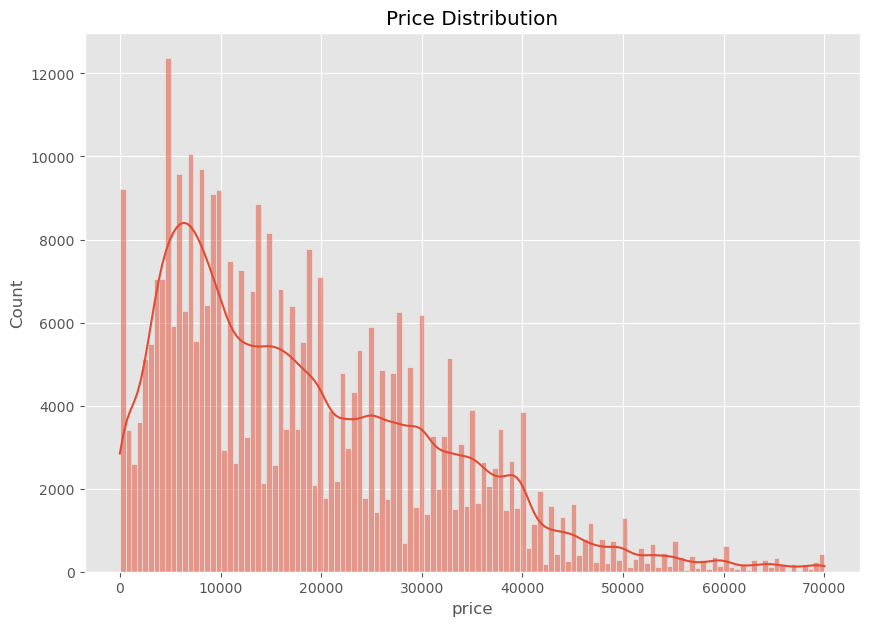

In [311]:
#Price distribution
plt.figure(figsize = (10, 7))
sns.histplot(data=eval_df, x='price', stat='count', kde=True).set(title="Price Distribution")

*Large number of cars are under 20k, with a large majority within 40k*

[Text(0.5, 1.0, 'Price by Year'), None]

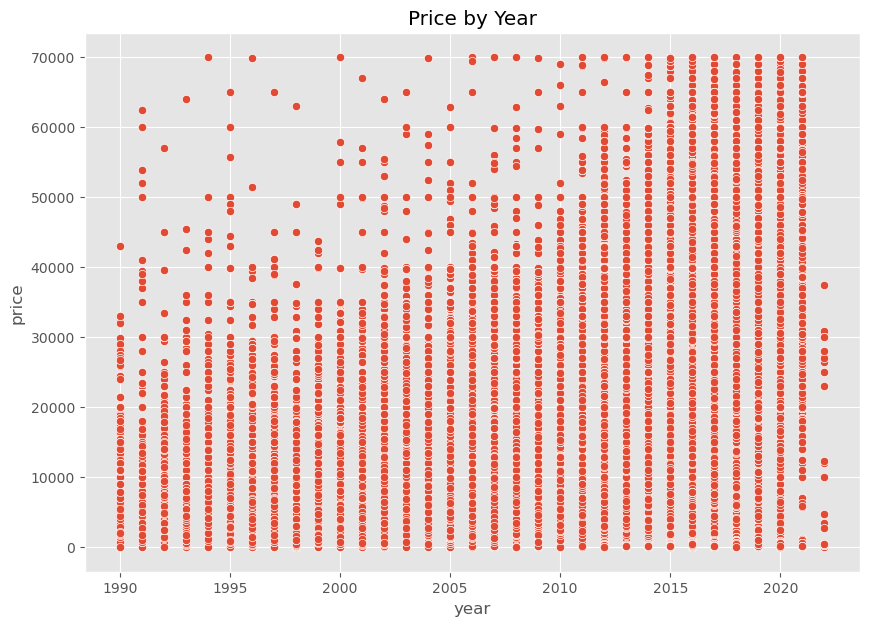

In [312]:
#Price by Year
plt.figure(figsize = (10, 7))
sns.scatterplot(data=eval_df, x='year', y='price').set(title = "Price by Year", alpha=0.6)

*Newer cars fetch higher prices*


[Text(0.5, 1.0, 'Price by Odometer'), None]

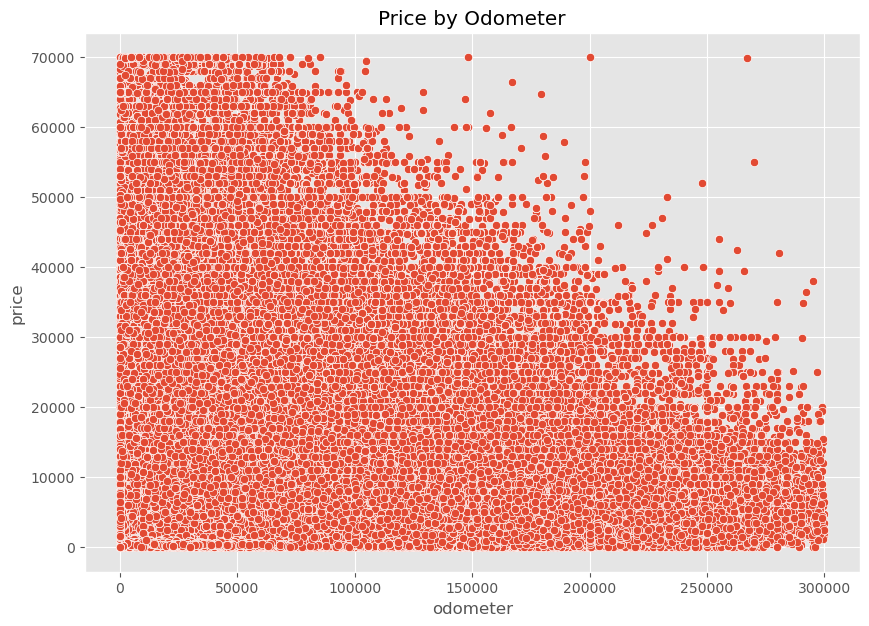

In [367]:
#Price by Odometer
plt.figure(figsize = (10, 7))
sns.scatterplot(data=eval_df, x='odometer', y='price').set(title = "Price by Odometer", alpha=0.6)

*Price declines as odometer goes higher OR more miles on the car reduces the price of the car*

**Car 'model'**

In [354]:
# Top 10 model counts
top10_model_counts = eval_df.model.value_counts().sort_values(ascending=False)[:10]
top10_model_counts

model
f-150             6897
silverado 1500    4426
1500              3752
camry             2784
accord            2682
silverado         2589
wrangler          2579
civic             2567
escape            2486
altima            2463
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'f-150'),
  Text(1, 0, 'silverado 1500'),
  Text(2, 0, '1500'),
  Text(3, 0, 'camry'),
  Text(4, 0, 'accord'),
  Text(5, 0, 'silverado'),
  Text(6, 0, 'wrangler'),
  Text(7, 0, 'civic'),
  Text(8, 0, 'escape'),
  Text(9, 0, 'altima')])

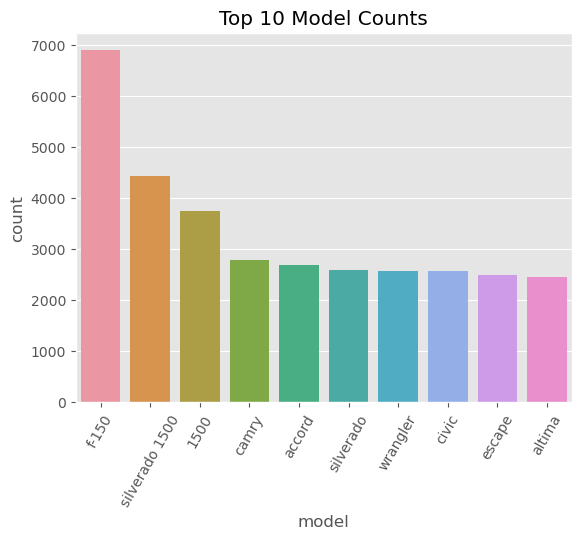

In [383]:
# Plot counts of top 10 models
sns.barplot(x=top10_model_counts.index, y=top10_model_counts.values).set_title('Top 10 Model Counts')
plt.xlabel('model')
plt.ylabel('count')
plt.xticks(rotation=60)

*Models F-150, silverado 1500 and 1500 have the highest number of cars*

In [400]:
df.shape

(357918, 11)

In [401]:
eval_df.shape

(357918, 11)

In [356]:
# Extract data for top 10 models in a dataframce
df_top10_models = df.query("model in @top10_model_counts.index")
print(df_top10_models.shape)
df_top10_models.sample(5)

(33225, 11)


region  price    year manufacturer           model  condition  \
309456         tulsa  20997  2012.0    chevrolet  silverado 1500  excellent   
183153     baltimore  16995  2010.0         ford           f-150       good   
98452   jacksonville  14800  2016.0        honda          accord       good   
245842       lincoln  60645  2020.0         ford           f-150       good   
339000       reading  10500  2013.0         ford          escape       good   

       fuel  odometer title_status transmission state  
309456  gas  133959.0        clean    automatic    ok  
183153  gas  155000.0        clean    automatic    md  
98452   gas   54101.0        clean    automatic    fl  
245842  gas    5292.0        clean    automatic    ne  
339000  gas  107557.0        clean    automatic    pa

[Text(0.5, 1.0, 'Price by model (+manufacturer) -- Top 10 models')]

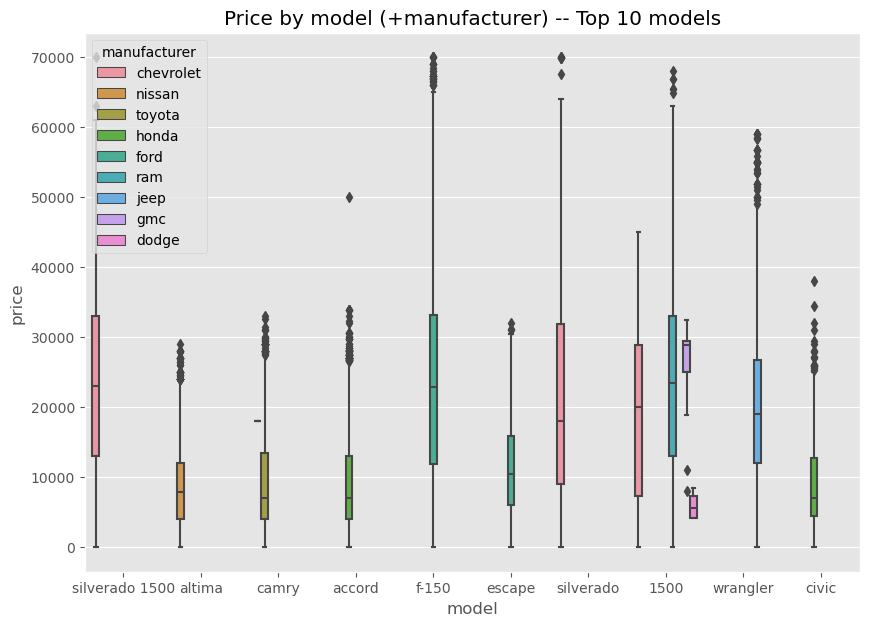

In [357]:
# Price by top 10 models
plt.figure(figsize = (10, 7))
sns.boxplot(data=df_top10_models, x='model', y='price', hue='manufacturer').set(title = "Price by model (+manufacturer) -- Top 10 models")

##### Price by model
* Seem to be discrepancies in the model values. For example, silverado 1500 may be same as silverado?
* Also, there is a 1500 model for 4 different manufacturers
* f-150, silverado 1500, silverado, 1500 models tend to fetch higher prices
  

In [360]:
# Top 10 manufacturer counts
top10_manufacturer_counts = eval_df.manufacturer.value_counts().sort_values(ascending=False)[:10]
top10_manufacturer_counts

manufacturer
ford         60443
chevrolet    45801
toyota       30651
honda        19499
nissan       17082
jeep         16726
ram          15182
gmc          14525
bmw          13438
dodge        11606
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ford'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'honda'),
  Text(4, 0, 'nissan'),
  Text(5, 0, 'jeep'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'gmc'),
  Text(8, 0, 'bmw'),
  Text(9, 0, 'dodge')])

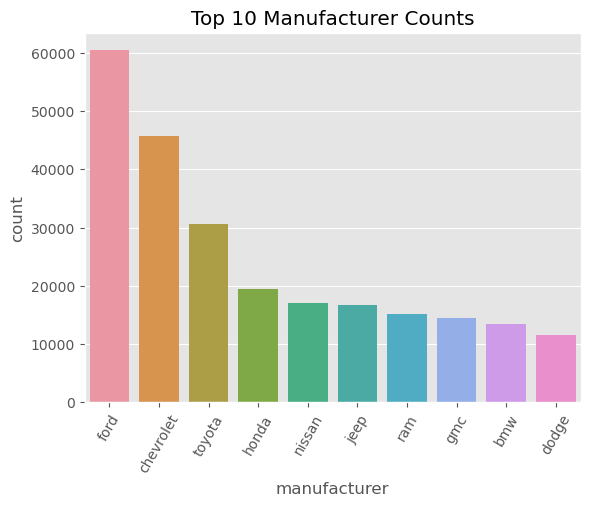

In [382]:
# Plot counts of top 10 manufacturers
sns.barplot(x=top10_manufacturer_counts.index, y=top10_manufacturer_counts.values).set_title('Top 10 Manufacturer Counts')
plt.xlabel('manufacturer')
plt.ylabel('count')
plt.xticks(rotation=60)

*ford, chevrolet, toyota are the top 3 manufacturers in the dataset*
___________

In [363]:
# Extract data for top 10 manufacturers in a dataframe
df_top10_manufacturers = df.query("manufacturer in @top10_manufacturer_counts.index")
print(df_top10_manufacturers.shape)
df_top10_manufacturers.sample(5)

(244953, 11)


region  price    year manufacturer               model  \
269983  hudson valley  11495  2016.0       nissan               rogue   
207156       muskegon  38988  2018.0         ford               f-150   
307048  oklahoma city  15988  2013.0         ford                edge   
312032           bend  19722  2018.0        honda   civic lx sedan 4d   
250784     central NJ  32985  2015.0         jeep  wrangler unlimited   

       condition fuel  odometer title_status transmission state  
269983      good  gas   84357.0        clean    automatic    ny  
207156      good  gas   18752.0        clean    automatic    mi  
307048  like new  gas   63190.0        clean    automatic    ok  
312032      good  gas   31410.0        clean        other    or  
250784      good  gas   79663.0        clean    automatic    nj

[Text(0.5, 1.0, 'Price by manufacturer -- Top 10 manufacturers')]

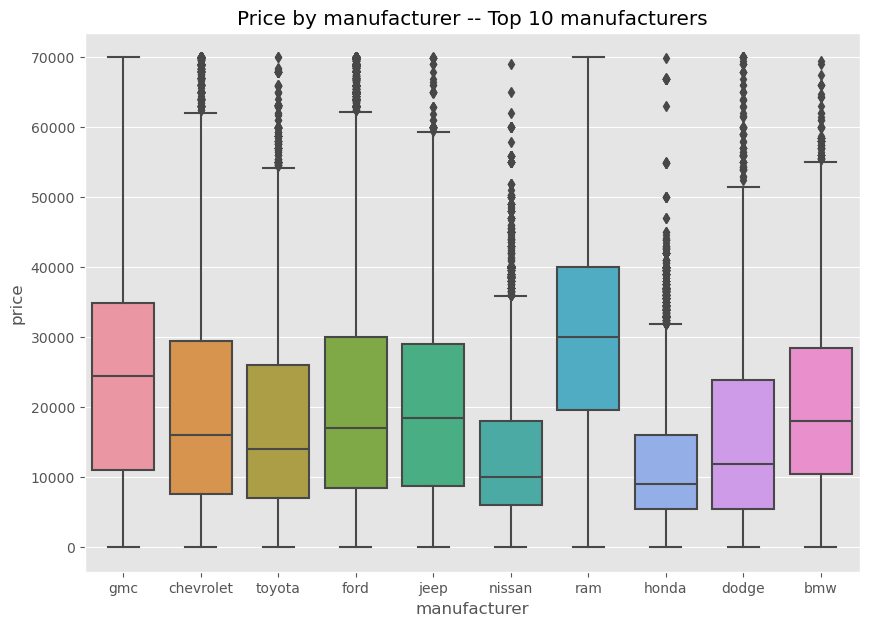

In [364]:
#Price by manufacturer
plt.figure(figsize = (10, 7))
sns.boxplot(data=df_top10_manufacturers, x='manufacturer', y='price').set(title = "Price by manufacturer -- Top 10 manufacturers")

*ram and gmc manufactured cars seem to attract higher price*
__________

[Text(0.5, 1.0, 'Price by manufacturer -- Top 10 manufacturers')]

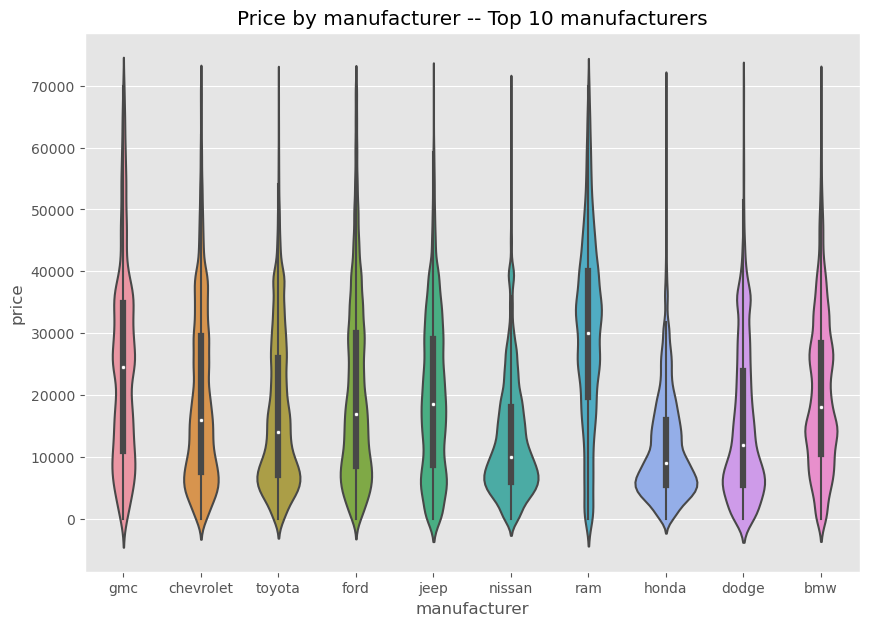

In [365]:
#Price by manufacturer
plt.figure(figsize = (10, 7))
sns.violinplot(data=df_top10_manufacturers, x='manufacturer', y='price').set(title = "Price by manufacturer -- Top 10 manufacturers")

*Manufacturer ram seems to sell for highest median prices, followed by gmc*
____

#### Analyze categorical columns condition, title_status, transmission and fuel data distributions

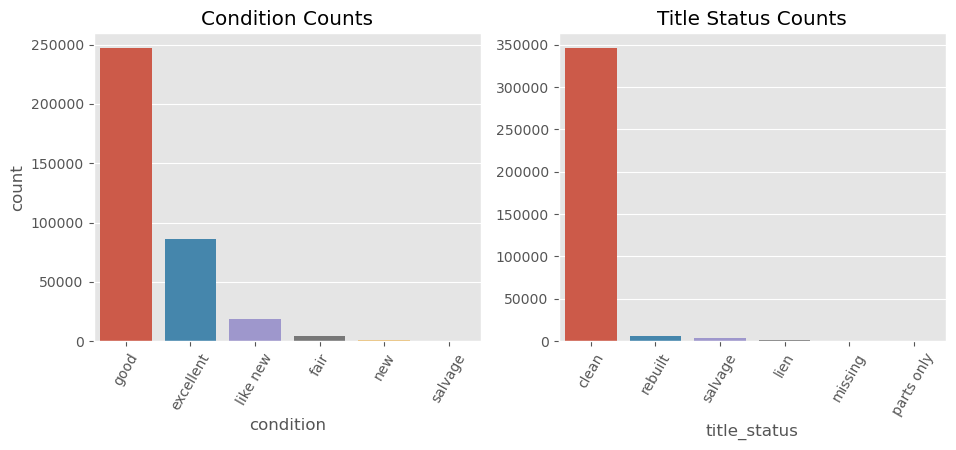

In [396]:
# Plot condition, title_status and transmission counts
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# Plot counts of condition
condition_counts = eval_df.condition.value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=condition_counts.index, y=condition_counts.values, ax=ax[0]).set_title('Condition Counts')
ax[0].set_xlabel('condition')
ax[0].set_ylabel('count')
ax[0].tick_params(axis='x', rotation=60)

# Plot counts of title_status
title_status_counts = eval_df.title_status.value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=title_status_counts.index, y=title_status_counts.values, ax=ax[1]).set_title('Title Status Counts')
ax[1].set_xlabel('title_status')
#ax[1].set_ylabel('count')
ax[1].tick_params(axis='x', rotation=60)

* good/excellent condition is over 95% of the data. May not be enough data for a good pricing model for this factor
* Similarly, over 98% of the cars have clean/other title

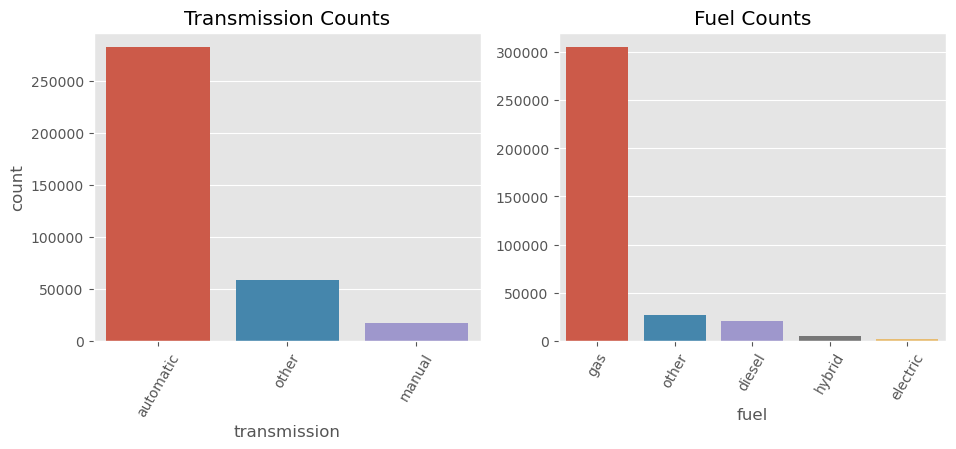

In [397]:
# Plot condition, title_status and transmission counts
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# Plot counts of transmission
transmission_counts = eval_df.transmission.value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, ax=ax[0]).set_title('Transmission Counts')
ax[0].set_xlabel('transmission')
ax[0].set_ylabel('count')
ax[0].tick_params(axis='x', rotation=60)

# Plot counts of fuel
fuel_counts = eval_df.fuel.value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, ax=ax[1]).set_title('Fuel Counts')
ax[1].set_xlabel('fuel')
ax[1].tick_params(axis='x', rotation=60)

* Less than 7% cars have manual transmission
* Less than 10% of the cars use diesel fuel or are hybrid/electric

### Deployment ###

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Findings
* *The car model, year and miles driven (odometer) are the biggest factors driving the price of a used car.*
* Newer cars fetch higher price
* Lower miles on the car leads to higher price
* Car models are an important factor in determining the price of the car
* For example, F-150, Silverado 1500, ram 1500 are priced well above the other models
* Car models data shows few inconsistencies in the data entered which results in perhaps diluting a particular model or mixing it up with different manufacturer models
* Cars manufactured by Ram and GMC are much higher priced than the other manufacturers
* Ford(60k), Chevrolet(46k), Toyota(30k) have the max number of cars in the data analyzed
* And, the F-150(7k), Silverado 1500(4.4k) and Ram 1500(3.8k) have the highest number of models in the dataset
* good/excellent condition is over 95% of the data. May not be enough data for a good pricing model for this factor
* Similarly, over 98% of the cars have clean/other title
* Less than 7% cars have manual transmission, majority are automatic transmission
* Majority of cars use gas fuel. Less than 10% of the cars use diesel fuel or are hybrid/electric

#### Next Steps and Recommendations ####
* It would be beneficial to focus on acquiring and listing newer models with lower odometer readings.
* Models F-150, Silverado 1500, ram 1500 should be preferred as they have good volume and likely to have better demand and sales prices which should result in better margins
* Among manufacturers, it would be better to focus on Ram and GMC
* It would be worthwhile to clean up the data, especially for model and manufacturer. It will help create better pricing models with higher accuracy and enable the dealer to price the cars closer to the real value and generate better / quicker sales
